In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import time
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("emails.csv")

In [ ]:
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.shape

(5172, 3002)

In [ ]:
data = data.drop('Email No.',axis=1)

In [ ]:
data.shape

(5172, 3001)

In [ ]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [ ]:
data['Prediction'].value_counts()

,count
Prediction,
0,3672
1,1500


In [ ]:
X = data.drop('Prediction', axis=1)
y = data['Prediction']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
knn_time = time.time() - start
knn_acc= accuracy_score(y_test, y_pred)

print("\n************** K-Nearest Neighbors ****************\n")
print(f"Training time: {knn_time}s")
print(f"Accuracy: {knn_acc}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


************** K-Nearest Neighbors ****************

Training time: 1.7142126560211182s
Accuracy: 0.8743961352657005

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       739
           1       0.82      0.71      0.76       296

    accuracy                           0.87      1035
   macro avg       0.86      0.83      0.84      1035
weighted avg       0.87      0.87      0.87      1035



In [ ]:
neigh.score(X_train, y_train)
neigh.score(X_test, y_test)

0.8628019323671497

In [ ]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[646,  93],
       [ 49, 247]])

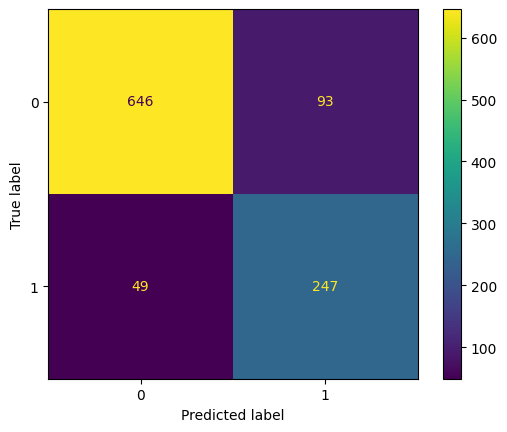

In [ ]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [ ]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred)

accuracy_score: 


0.8628019323671497

In [ ]:
print("precision_score: ")
precision_score(y_test, y_pred)

precision_score: 


0.7264705882352941

In [ ]:
print("recall_score: ")
recall_score(y_test, y_pred)

recall_score: 


0.8344594594594594

In [ ]:
print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.13719806763285025

In [ ]:
from sklearn.svm import SVC
start = time.time()
svm = SVC(kernel = 'linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm_time = time.time()-start
svm_acc= accuracy_score(y_test, y_pred)

print(f"Training time: {svm_time}s")
print(f"Accuracy: {svm_acc}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training time: 8.604239702224731s
Accuracy: 0.9594202898550724

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [ ]:
svm.score(X_train, y_train)
svm.score(X_test, y_test)

0.9594202898550724

In [ ]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[715,  24],
       [ 18, 278]])

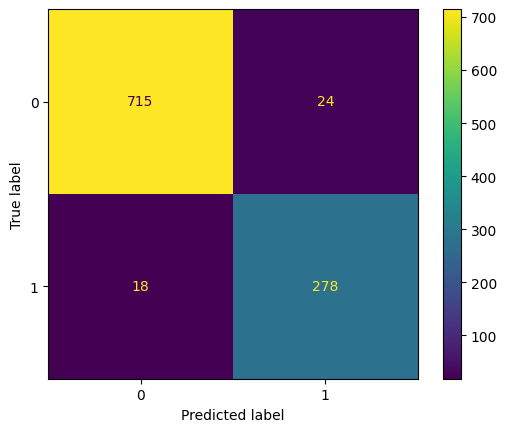

In [ ]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()